In [10]:
import pandas as pd
import numpy as np
import re
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:

fake_df = pd.read_csv("Fake.csv")
real_df = pd.read_csv("True.csv")


fake_df["label"] = 0
real_df["label"] = 1


df = pd.concat([fake_df, real_df], axis=0)


df = df.sample(frac=1).reset_index(drop=True)


df = df[["text", "label"]]

print(df.head())


                                                text  label
0  While it s certainly not true that Donald Trum...      0
1  It would appear that Barack didn t get the mem...      0
2  TOKYO (Reuters) - The leaders of Japan and Bri...      1
3  MANILA (Reuters) - U.S. President Donald Trump...      1
4  There s been news erupting all over the place ...      0


In [12]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower() 
    text = re.sub(r'\W', ' ', text)  
    text = re.sub(r'\s+', ' ', text)  
    text = ' '.join([word for word in text.split() if word not in stop_words])  
    return text

df["text"] = df["text"].apply(clean_text)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rounakagrawal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:

tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(df["text"])
sequences = tokenizer.texts_to_sequences(df["text"])


max_length = 500  
X = pad_sequences(sequences, maxlen=max_length)


y = np.array(df["label"])


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(f"Vocabulary Size: {len(tokenizer.word_index) + 1}")  


Vocabulary Size: 121409


In [18]:
print(f"X_train shape: {X_train.shape}")  


X_train shape: (35918, 500)


In [19]:

vocab_size = len(tokenizer.word_index) + 1  


model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),  
    LSTM(128, return_sequences=True), 
    Dropout(0.2),
    LSTM(64, return_sequences=False),  
    Dropout(0.2),
    Dense(1, activation="sigmoid")  
])


model.build(input_shape=(None, max_length))  


model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 500, 128)       │    15,540,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 500, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 500, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,721,409 (59.97 MB)

 Trainable params: 15,721,409 (59.97 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 343s 609ms/step - accuracy: 0.9256 - loss: 0.1977 - val_accuracy: 0.9886 - val_loss: 0.0316
Epoch 2/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 337s 600ms/step - accuracy: 0.9858 - loss: 0.0414 - val_accuracy: 0.9938 - val_loss: 0.0234
Epoch 3/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 336s 598ms/step - accuracy: 0.9961 - loss: 0.0142 - val_accuracy: 0.9855 - val_loss: 0.0523
Epoch 4/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 339s 604ms/step - accuracy: 0.9923 - loss: 0.0261 - val_accuracy: 0.9967 - val_loss: 0.0125
Epoch 5/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 349s 621ms/step - accuracy: 0.9978 - loss: 0.0079 - val_accuracy: 0.9967 - val_loss: 0.0140
Epoch 6/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 363s 646ms/step - accuracy: 0.9951 - loss: 0.0160 - val_accuracy: 0.9980 - val_loss: 0.0082
Epoch 7/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 358s 637ms/step - accuracy: 0.9984 - loss: 0.0070 - val_accuracy: 0.9958 - val_loss: 0.0172
Epoch 8/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 359s 638ms/step - accuracy: 0.9985 -

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

281/281 ━━━━━━━━━━━━━━━━━━━━ 34s 122ms/step - accuracy: 0.9984 - loss: 0.0065
Test Accuracy: 99.79%


In [22]:
def predict_fake_news(text):
    text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_length)
    prediction = model.predict(padded)
    return "Real" if prediction >= 0.5 else "Fake"

news = "Breaking news: Scientists discover a new way to cure cancer!"
print(predict_fake_news(news))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Fake


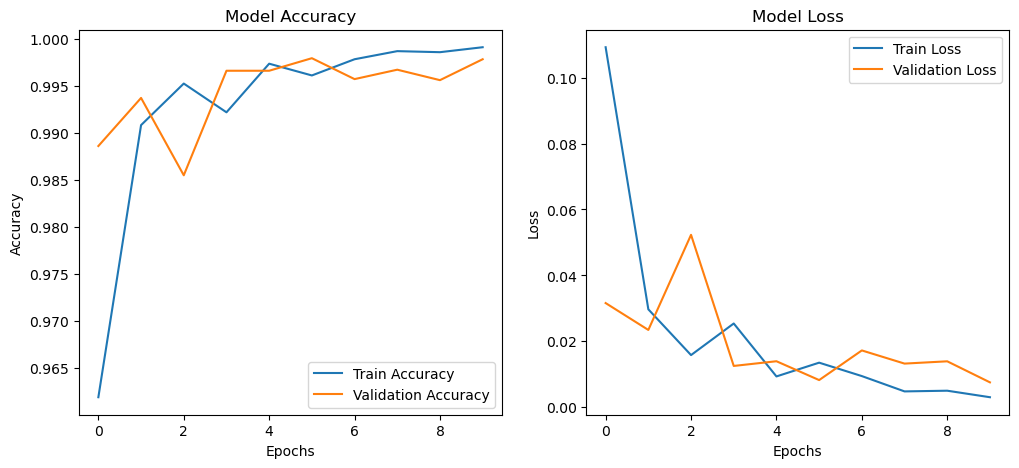

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()
